<a href="https://colab.research.google.com/github/AnkitRajSri/Effects-of-Lockdown-on-Mental-Health/blob/master/Healthcare_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Sourcing

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
!pip install pyLDAvis
import plotly.express as px

#os.chdir(r'C:\Users\sriva\OneDrive\Desktop\COVID_Project')

# import gensim.downloader as api
# wv300 = api.load('word2vec-google-news-300')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 1.6MB 3.3MB/s 
     |████████████████████████████████| 552kB 26.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7a8c8ef34470d9940c2637db9e3ac47283bb4a22f6fd19ce9ac5b9c027eb43ed
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=3daec42c12774efa6bd615d0ae42b4dcb069ac7c5552976e556a603957870340
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [2]:
articles_data = pd.read_excel('All_Articles_Excel.xlsx')
print(articles_data.shape)
articles_data.head(3)

(41221, 94)


,Date Added,Author,Title,Abstract,Year,Journal/Publisher,Volume,Issue,Pages,Accession Number,DOI,URL,Name of Database,Database Provider,Language,Keywords,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93
0,2020-06-02,"裕己, 畑",ICUAWの診断,NaN,2020,臨床神経生理学,NaN,NaN,NaN,NaN,10.11422/jscn.48.128,https://doi.org/10.11422/jscn.48.128,COVIDWHO,https://www.who.int/emergencies/diseases/novel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-02,"和俊, 笹",ウェブの功罪,NaN,2020,情報の科学と技術,NaN,NaN,NaN,NaN,10.18919/jkg.70.6_309,https://doi.org/10.18919/jkg.70.6_309,COVIDWHO,https://www.who.int/emergencies/diseases/novel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-02,"Zwanka, RJB, Cheryl",COVID-19 Generation: A Conceptual Framework of...,NaN,2020,Journal of International Consumer Marketing,NaN,NaN,NaN,NaN,10.1080/08961530.2020.1771646,https://doi.org/10.1080/08961530.2020.1771646,COVIDWHO,https://www.who.int/emergencies/diseases/novel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
articles_data = articles_data.loc[:, 'Date Added':'Keywords']
#articles_data.drop(['Volume', 'Issue', 'Pages', 'Accession Number', 'DOI', 'URL', 'Name of Database', 'Database Provider'], axis=1, inplace=True)
articles_data.shape

(41221, 16)

In [4]:
articles_data['Language'].value_counts()

eng                                                                                                                                                                                                  8747
English                                                                                                                                                                                              7886
es                                                                                                                                                                                                    660
pt                                                                                                                                                                                                    581
en                                                                                                                                                                                              

In [5]:
english_articles_data = articles_data.loc[(articles_data['Language'].values == 'eng') | (articles_data['Language'].values == 'English'), 'Date Added': 'Journal/Publisher'].reset_index()
english_articles_data = english_articles_data.drop(['index'], axis = 1)
english_articles_data.shape

(16633, 6)

In [6]:
english_articles_data.head(3)

,Date Added,Author,Title,Abstract,Year,Journal/Publisher
0,2020-06-02,"Zubair, ASM, L. S.; Gardin, T.; Farhadian, S.;...",Neuropathogenesis and Neurologic Manifestation...,Importance: Severe acute respiratory syndrome ...,2020,JAMA Neurology
1,2020-06-02,"Zimmerman, CEH, L. S.; Taylor, J. A.",A Tiered-System to Guide Prioritization of Ped...,NaN,2020,Plastic and reconstructive surgery
2,2020-06-02,"Ziegler, R",Challenges in the Care of Children and Youth W...,NaN,2020,Journal of Diabetes Science & Technology


In [7]:
english_articles_data.isna().sum()

Date Added              0
Author                434
Title                   0
Abstract             7518
Year                    0
Journal/Publisher       3
dtype: int64

In [8]:
english_articles_data = english_articles_data[english_articles_data['Abstract'].notnull()]
english_articles_data.shape

(9115, 6)

In [9]:
english_articles_data.isna().sum()

Date Added             0
Author               247
Title                  0
Abstract               0
Year                   0
Journal/Publisher      2
dtype: int64

In [0]:
mental_health_keywords = ['mental', 'trauma', 'traumatic', 'therapy', 'therapist', 'psychology', 'psychological', 'anxiety', 'depression', 'suicide', 'phobia', 'stress']

In [11]:
words_to_focus = []
words_to_focus = [w for w in mental_health_keywords]
for word in mental_health_keywords:
  similar_words_dict = wv300.most_similar(word)[:4]
  similar_words = [w for w, p in similar_words_dict]
  for w in similar_words:
    words_to_focus.append(w)

len(words_to_focus)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



60

In [12]:
health_data = english_articles_data.loc[english_articles_data['Abstract'].apply(lambda x: any([k in x.lower() for k in words_to_focus])), 'Date Added' : 'Journal/Publisher'].reset_index()
health_data.drop(['index'], axis=1, inplace=True)
print(health_data.shape)
health_data.head(3)

(2424, 6)


,Date Added,Author,Title,Abstract,Year,Journal/Publisher
0,2020-06-02,"Zhao, XL, M.; Li, H.; Yang, J.",Perceived stress and sleep quality among the n...,BACKGROUND: The 2019 coronavirus disease (COVI...,2020,Sleep medicine
1,2020-06-02,"Yang, KS, Y.; Huang, C.; Jin, Y.; Xiong, N.; J...","Clinical characteristics, outcomes, and risk f...",BACKGROUND: Patients with cancer are a high-ri...,2020,Lancet Oncology
2,2020-06-02,"Xu, YL, H.; Hu, K.; Wang, M.",Clinical recommendations on lung cancer manage...,Coronavirus disease 2019 (COVID-19) is spreadi...,2020,Thoracic Cancer


### Data Preprocessing

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
import re

stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def cleanText(text):
  text = text.replace('health care', 'healthcare')
  words = regexp_tokenize(text.lower(), r'[A-Za-z]+')
  junk_words = ['background', 'objective', 'covid', 'coronavirus', 'pandemic', 'cov', 'novel', 'outbreak', 'china', 'wuhan', 'sars']
  words = [lemmatizer.lemmatize(w) for w in words if w not in stopwords and w not in junk_words and len(w) > 2]
  cleaned_text = ' '.join(words)
  return cleaned_text

In [0]:
health_data['CleanedAbstract'] = health_data['Abstract'].apply(lambda x : cleanText(x))

In [17]:
health_data.head(3)

,Date Added,Author,Title,Abstract,Year,Journal/Publisher,CleanedAbstract
0,2020-06-02,"Zhao, XL, M.; Li, H.; Yang, J.",Perceived stress and sleep quality among the n...,BACKGROUND: The 2019 coronavirus disease (COVI...,2020,Sleep medicine,disease spread worldwide associated stressor r...
1,2020-06-02,"Yang, KS, Y.; Huang, C.; Jin, Y.; Xiong, N.; J...","Clinical characteristics, outcomes, and risk f...",BACKGROUND: Patients with cancer are a high-ri...,2020,Lancet Oncology,patient cancer high risk population aimed desc...
2,2020-06-02,"Xu, YL, H.; Hu, K.; Wang, M.",Clinical recommendations on lung cancer manage...,Coronavirus disease 2019 (COVID-19) is spreadi...,2020,Thoracic Cancer,disease spreading worldwide declared internati...


### Data Exploration

##### Frequency of articles published each day after the outbreak

In [18]:
articles_published_each_day = pd.DataFrame(health_data['Date Added'].value_counts()).reset_index()
articles_published_each_day.columns = ['DateAdded', 'NoOfArticles']
articles_published_each_day = articles_published_each_day.sort_values(by = 'DateAdded')

fig = px.line(articles_published_each_day, x = 'DateAdded', y = 'NoOfArticles', title = 'No of Articles added after the outbreak')
fig.show()

##### Frequently used vocabulary

In [0]:
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob

def extractNouns(text):
  blob = TextBlob(text)
  target_pos = ''
  for w, p in blob.tags:
    if p == 'NN':
      target_pos = target_pos + ' ' + w
  return target_pos

def extractRelevantPOS(text):
  blob = TextBlob(text)
  target_pos = ''
  for w, p in blob.tags:
    if p == 'NN' or p == 'JJ' or p == 'RB':
      target_pos = target_pos + ' ' + w
  return target_pos

def findFrequentlyUsedWords(text):
  nouns = extractRelevantPOS(text)
  words = word_tokenize(nouns)
  #junk_words = ['virus', 'may', 'also', 'pandemic', 'cov', 'novel', 'outbreak', 'china', 'wuhan', 'sars']
  words = [w for w in words]
  frequent_words = Counter(words).most_common(30)
  return frequent_words

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
most_common_vocab = findFrequentlyUsedWords(' '.join(health_data['CleanedAbstract'].values))

In [22]:
vocab_df = pd.DataFrame(most_common_vocab)
vocab_df.columns = ['Word', 'Count']
vocab_df.head(5)

,Word,Count
0,patient,4875
1,disease,2335
2,infection,1722
3,health,1676
4,treatment,1584


In [23]:
fig = px.bar(vocab_df, x = 'Word', y = 'Count', title = 'Most Common vocabulary')
fig.show()
#fig.write_image('vocab.jpg')

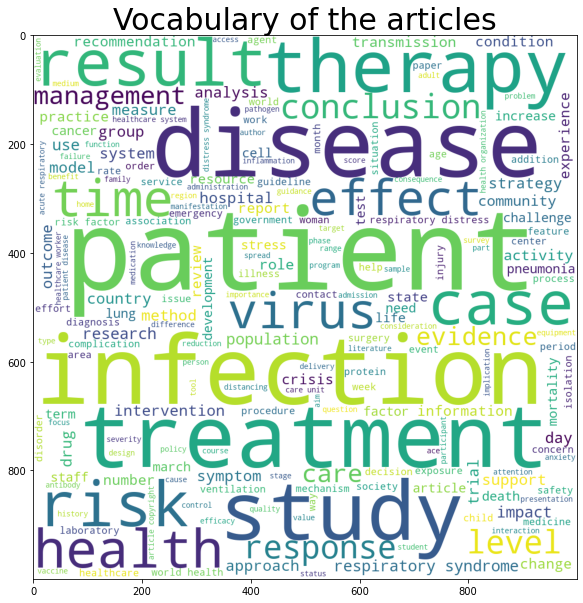

In [24]:
from wordcloud import WordCloud

# Created a tokenized list of cleaned titles
tokenized_nouns = []
for text in health_data['CleanedAbstract'].values:
  nouns = extractNouns(text)
  words = word_tokenize(nouns)
  #junk_words = ['covid', 'coronavirus', 'pandemic', 'cov', 'novel', 'outbreak', 'china', 'wuhan', 'sars']
  words = [w for w in words]
  tokenized_nouns.append(words)

text_corpus = ' '.join([' '.join(w) for w in tokenized_nouns])
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white', min_font_size = 12).generate(text_corpus)
plt.title('Vocabulary of the articles', fontsize=30)
plt.imshow(wordcloud)
plt.show()

### Topic Modelling

##### DTM and TF-IDF input with a corpus of nouns



In [0]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, phrases, Phrases, LsiModel, LdaModel, LdaMulticore, CoherenceModel

# Created a dictionary of word and its count
dictionary1 = Dictionary(tokenized_nouns)
dictionary1.filter_extremes(no_below = 5, no_above = 0.90)

# Created a document-term matrix and tfidf vector
dtm1 = [dictionary1.doc2bow(doc) for doc in tokenized_nouns]
tfidf1 = TfidfModel(dtm1)
tfidf1 = tfidf1[dtm1]

##### DTM and TF-IDF input with bigrams and trigrams corpus

In [26]:
tokenized_words = []
for text in health_data['CleanedAbstract'].values:
  filtered_text = extractRelevantPOS(text)
  words = word_tokenize(filtered_text)
  #junk_words = ['covid', 'coronavirus', 'pandemic', 'cov', 'novel', 'outbreak', 'china', 'wuhan', 'sars']
  words = [w for w in words]
  tokenized_words.append(words)

# Build the bigram and trigram models
bigram = Phrases(tokenized_words, min_count=5, threshold=100)
trigram = Phrases(bigram[tokenized_words], threshold=100)

bigram_mod = phrases.Phraser(bigram)
trigram_mod = phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [0]:
def createBigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def createTrigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [0]:
tokenized_bigrams = createBigrams(tokenized_words)
tokenized_trigrams = createTrigrams(tokenized_words)

In [0]:
# Created the bigrams and trigrams inputs
dictionary2 = Dictionary(tokenized_bigrams)
dictionary2.filter_extremes(no_below = 5, no_above = 0.90)

dtm2 = [dictionary2.doc2bow(doc) for doc in tokenized_bigrams]
tfidf2 = TfidfModel(dtm2)
tfidf2 = tfidf2[dtm2]

dictionary3 = Dictionary(tokenized_trigrams)
dictionary3.filter_extremes(no_below = 5, no_above = 0.90)

dtm3 = [dictionary3.doc2bow(doc) for doc in tokenized_trigrams]
tfidf3 = TfidfModel(dtm3)
tfidf3 = tfidf3[dtm3]

##### Model Creation

In [0]:
# Determined the optimum number of topics with maximum coherence
def getMaxCoherenceModels(corpus, dictionary, text, input_type, is_lsi):
  model_df = pd.DataFrame(columns = ['Model', 'Input', 'Topics', 'Alpha', 'Beta', 'Coherence'])
  
  min_topics, max_topics, step = 1, 11, 1
  list_alpha = list(np.arange(0.01, 1, 0.3))
  list_beta = list(np.arange(0.01, 1, 0.3))
  model_name = ''
  i = 0
  for num in range(min_topics, max_topics, step):
    for a in list_alpha:
      for b in list_beta:
        if is_lsi == True:
          model = LsiModel(corpus, id2word=dictionary, num_topics=num)
          model_name = 'LsiModel'
        # elif model_num == 2:
        #   model = LdaModel(corpus, id2word=dictionary, num_topics=num, passes=10)
        #   model_name = 'LdaModel'
        else:
          model = LdaMulticore(corpus, id2word=dictionary, num_topics=num, passes=10, workers=3)
          model_name = 'LdaMulticore'
        coherence_model = CoherenceModel(model=model, texts=text, dictionary=dictionary, coherence='c_v')
        #rows = {'Model': model_name, 'Input': input, 'Topics': num, 'Alpha': a, 'Beta': b, 'Coherence': coherence_model.get_coherence()}
        model_df.loc[i, 'Model'] = model_name
        model_df.loc[i, 'Input'] = input_type
        model_df.loc[i, 'Topics'] = num
        model_df.loc[i, 'Alpha'] = a
        model_df.loc[i, 'Beta'] = b
        model_df.loc[i, 'Coherence'] = coherence_model.get_coherence()
        i = i + 1
        #coherence_values.append(coherencemodel.get_coherence())
  return model_df

In [0]:
# lsi_models_with_words = getMaxCoherenceModels(dtm1, dictionary1, tokenized_nouns, 'words', is_lsi=True)
# lsi_models_with_bigrams = getMaxCoherenceModels(dtm2, dictionary2, tokenized_words, 'bigrams', is_lsi=True)
# lsi_models_with_trigrams = getMaxCoherenceModels(dtm3, dictionary3, tokenized_words, 'trigrams', is_lsi=True)

/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning:

invalid value encountered in double_scalars



In [31]:
lda_multicore_with_words = getMaxCoherenceModels(tfidf1, dictionary1, tokenized_nouns, 'words', is_lsi=False)
lda_multicore_with_words

,Model,Input,Topics,Alpha,Beta,Coherence
0,LdaMulticore,words,1,0.01,0.01,0.369627
1,LdaMulticore,words,1,0.01,0.31,0.369627
2,LdaMulticore,words,1,0.01,0.61,0.369627
3,LdaMulticore,words,1,0.01,0.91,0.369627
4,LdaMulticore,words,1,0.31,0.01,0.369627
...,...,...,...,...,...,...
155,LdaMulticore,words,10,0.61,0.91,0.461845
156,LdaMulticore,words,10,0.91,0.01,0.414351
157,LdaMulticore,words,10,0.91,0.31,0.457347
158,LdaMulticore,words,10,0.91,0.61,0.451738


In [41]:
lda_multicore_with_words.sort_values('Coherence', ascending=False)

,Model,Input,Topics,Alpha,Beta,Coherence
107,LdaMulticore,words,7,0.61,0.91,0.554841
54,LdaMulticore,words,4,0.31,0.61,0.549977
144,LdaMulticore,words,10,0.01,0.01,0.545237
33,LdaMulticore,words,3,0.01,0.31,0.537102
29,LdaMulticore,words,2,0.91,0.31,0.530501
...,...,...,...,...,...,...
1,LdaMulticore,words,1,0.01,0.31,0.369627
15,LdaMulticore,words,1,0.91,0.91,0.369627
25,LdaMulticore,words,2,0.61,0.31,0.354651
59,LdaMulticore,words,4,0.61,0.91,0.345483


In [45]:
lda_multicore_with_bigrams = getMaxCoherenceModels(tfidf2, dictionary2, tokenized_bigrams, 'bigrams', is_lsi=False)
lda_multicore_with_bigrams.sort_values('Coherence')

,Model,Input,Topics,Alpha,Beta,Coherence
39,LdaMulticore,bigrams,3,0.31,0.91,0.378758
81,LdaMulticore,bigrams,6,0.01,0.31,0.3946
0,LdaMulticore,bigrams,1,0.01,0.01,0.40406
15,LdaMulticore,bigrams,1,0.91,0.91,0.40406
14,LdaMulticore,bigrams,1,0.91,0.61,0.40406
...,...,...,...,...,...,...
156,LdaMulticore,bigrams,10,0.91,0.01,0.607429
155,LdaMulticore,bigrams,10,0.61,0.91,0.609575
147,LdaMulticore,bigrams,10,0.01,0.91,0.620096
46,LdaMulticore,bigrams,3,0.91,0.61,0.629829


In [0]:
# lda_multicore_with_trigrams = getMaxCoherenceModels(tfidf3, dictionary3, tokenized_trigrams, 'trigrams', is_lsi=False)
# lda_multicore_with_trigrams

In [0]:
models_data = pd.concat([lda_multicore_with_words, lda_multicore_with_bigrams], axis=0, ignore_index=True)

In [47]:
models_data.sort_values('Coherence',ascending=False)

,Model,Input,Topics,Alpha,Beta,Coherence
298,LdaMulticore,bigrams,9,0.61,0.61,0.650934
206,LdaMulticore,bigrams,3,0.91,0.61,0.629829
307,LdaMulticore,bigrams,10,0.01,0.91,0.620096
315,LdaMulticore,bigrams,10,0.61,0.91,0.609575
316,LdaMulticore,bigrams,10,0.91,0.01,0.607429
...,...,...,...,...,...,...
15,LdaMulticore,words,1,0.91,0.91,0.369627
1,LdaMulticore,words,1,0.01,0.31,0.369627
25,LdaMulticore,words,2,0.61,0.31,0.354651
59,LdaMulticore,words,4,0.61,0.91,0.345483


In [0]:
  # optimum_topics = coherence_values.index(max(coherence_values))
  # optimum_alpha = list_alpha[optimum]
  # return optimum_topics

# Created LsiModel and LdaModel from the dtm and tfidf respectively
# def createModel(corpus, dictionary, model_num):
#   if model_num == 1:
#     model = LsiModel(corpus, id2word = dictionary, num_topics = getMaxCoherence(corpus, dictionary, model_num), random_)
#   elif model_num == 2:
#     model = LdaModel(corpus, id2word = dictionary, num_topics = getMaxCoherence(corpus, dictionary, model_num), passes=10, iterations=50, random_state=95)
#   else:
#     model = LdaMulticore(corpus, id2word = dictionary, num_topics = getMaxCoherence(corpus, dictionary, model_num), passes=10, workers=4, iterations=50, random_state=95)
#   return model

# Created a function to determine the top 5 topics of each article
def getMostFrequentKeywords(model, corpus):
    list_of_keywords = []
    for i, record in enumerate(model[corpus]):
      record = sorted(record, key = lambda x : x[1], reverse = True)
      for j, (num_topic, prop_topic) in enumerate(record):
        word_prop = model.show_topic(num_topic)
        keywords = ', '.join([w for w, p in word_prop[:5]])
        list_of_keywords.append(keywords)
    return pd.Series(list_of_keywords)

In [0]:
lda_model_words = LdaMulticore(tfidf1, id2word = dictionary1, num_topics = 7, alpha=0.61, eta=0.61, passes=10, workers=3, iterations=50, random_state=95)

In [53]:
lda_model_words.print_topics()

[(0,
  '0.004*"patient" + 0.004*"infection" + 0.003*"health" + 0.003*"virus" + 0.003*"study" + 0.003*"disease" + 0.003*"risk" + 0.003*"therapy" + 0.003*"drug" + 0.002*"case"'),
 (1,
  '0.004*"patient" + 0.004*"case" + 0.003*"infection" + 0.003*"disease" + 0.003*"study" + 0.002*"child" + 0.002*"health" + 0.002*"treatment" + 0.002*"drug" + 0.002*"risk"'),
 (2,
  '0.004*"patient" + 0.003*"plasma" + 0.003*"therapy" + 0.003*"infection" + 0.002*"health" + 0.002*"convalescent" + 0.002*"respiratory" + 0.002*"disease" + 0.002*"treatment" + 0.002*"study"'),
 (3,
  '0.005*"health" + 0.004*"cancer" + 0.004*"patient" + 0.004*"treatment" + 0.003*"risk" + 0.003*"rehabilitation" + 0.003*"care" + 0.003*"system" + 0.003*"infection" + 0.002*"strategy"'),
 (4,
  '0.004*"treatment" + 0.004*"cell" + 0.003*"response" + 0.003*"drug" + 0.003*"health" + 0.003*"virus" + 0.003*"therapy" + 0.003*"hcq" + 0.003*"patient" + 0.002*"trial"'),
 (5,
  '0.007*"respiratory" + 0.006*"ace" + 0.005*"patient" + 0.005*"infectio

In [0]:
lda_model_bigrams = LdaMulticore(tfidf2, id2word = dictionary2, num_topics = 9, alpha=0.61, eta=0.61, passes=10, workers=3, iterations=50, random_state=95)

In [54]:
lda_model_bigrams.print_topics()

[(0,
  '0.003*"patient" + 0.002*"drug" + 0.002*"therapy" + 0.002*"treatment" + 0.002*"infection" + 0.002*"respiratory" + 0.002*"clinical" + 0.002*"case" + 0.002*"cancer" + 0.001*"disease"'),
 (1,
  '0.003*"ace" + 0.002*"patient" + 0.001*"disease" + 0.001*"receptor" + 0.001*"therapy" + 0.001*"drug" + 0.001*"cell" + 0.001*"infection" + 0.001*"severe" + 0.001*"mental"'),
 (2,
  '0.002*"patient" + 0.002*"health" + 0.001*"social" + 0.001*"care" + 0.001*"measure" + 0.001*"virus" + 0.001*"infection" + 0.001*"crisis" + 0.001*"epidemic" + 0.001*"case"'),
 (3,
  '0.002*"health" + 0.002*"cancer" + 0.001*"disease" + 0.001*"patient" + 0.001*"risk" + 0.001*"mental" + 0.001*"virus" + 0.001*"new" + 0.001*"public" + 0.001*"care"'),
 (4,
  '0.002*"patient" + 0.001*"treatment" + 0.001*"risk" + 0.001*"health" + 0.001*"severe" + 0.001*"therapy" + 0.001*"study" + 0.001*"respiratory" + 0.001*"clinical" + 0.001*"cancer"'),
 (5,
  '0.002*"virus" + 0.002*"risk" + 0.002*"patient" + 0.001*"health" + 0.001*"mental

In [0]:
# Models created using words frequency inputs
# lsi_model_words = createModel(dtm1, dictionary1, model_num=1)
# lda_model_words = createModel(tfidf1, dictionary1, model_num=2)
# lda_multicore_words = createModel(tfidf1, dictionary1, model_num=3)

health_data['KeywordsWords'] = getMostFrequentKeywords(lda_model_words, tfidf1)

In [0]:
health_data['KeywordsBigrams'] = getMostFrequentKeywords(lda_model_bigrams, tfidf2)


In [62]:
health_data[['Abstract', 'KeywordsWords', 'KeywordsBigrams']].head(10)

,Abstract,KeywordsWords,KeywordsBigrams
0,BACKGROUND: The 2019 coronavirus disease (COVI...,"cancer, health, anxiety, healthcare, care","patient, case, mental, psychological, health"
1,BACKGROUND: Patients with cancer are a high-ri...,"patient, infection, health, virus, study","patient, treatment, infection, respiratory, cl..."
2,Coronavirus disease 2019 (COVID-19) is spreadi...,"health, cancer, patient, treatment, risk","patient, health, social, care, measure"
3,"A novel coronavirus, named severe acute respir...","treatment, cell, response, drug, health","patient, drug, therapy, treatment, infection"
4,The COVID-19 pandemic has a strong negative im...,"patient, case, infection, disease, study","health, patient, respiratory, risk, infection"
5,"Diffuse pulmonary inflammation, endothelial in...","respiratory, ace, patient, infection, syndrome","health, cancer, disease, patient, risk"
6,BACKGROUND: Trends in contact with a high volu...,"patient, plasma, therapy, infection, health","virus, risk, patient, health, mental"
7,BACKGROUND: COVID-19 has spread globally. Epid...,"cancer, health, anxiety, healthcare, care","ace, patient, disease, receptor, therapy"
8,OBJECTIVE: To develop an emergency training pr...,"respiratory, ace, patient, infection, syndrome","patient, treatment, risk, health, severe"
9,The United States has more confirmed deaths fr...,"patient, infection, health, virus, study","patient, treatment, infection, respiratory, cl..."


In [63]:
import pyLDAvis.gensim              
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_bigrams, tfidf2, dictionary2)
pyLDAvis.display(vis)

In [0]:
health_data.to_csv('health_data.csv')
health_data.to_pickle('health_data.pkl')

In [65]:
words_to_focus

['mental',
 'trauma',
 'traumatic',
 'therapy',
 'therapist',
 'psychology',
 'psychological',
 'anxiety',
 'depression',
 'suicide',
 'phobia',
 'stress',
 'Mental',
 'mentally',
 'psychological',
 'psychiatric',
 'traumas',
 'trama',
 'psychological_trauma',
 'Trauma',
 'traumatizing',
 'Traumatic',
 'traumas',
 'traumatising',
 'therapies',
 'Therapy',
 'treatments',
 'psychotherapy',
 'therapists',
 'psychotherapist',
 'psychologist',
 'psychiatrist',
 'sociology',
 'pyschology',
 'Psychology',
 'anthropology',
 'pyschological',
 'mental',
 'psycological',
 'Psychological',
 'nervousness',
 'anxieties',
 'angst',
 'uneasiness',
 'bipolar_disorder',
 'depression_anxiety',
 'depressive_illness',
 'mental_illness',
 'Suicide',
 'suicides',
 'commit_suicide',
 'suicidal',
 'phobias',
 'aversion',
 'phobic',
 'acrophobia',
 'Stress',
 'anxiety',
 'stresses',
 'stressors']

##### Word2Vec input

In [0]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

tokenized_list = [simple_preprocess(text) for text in health_data['CleanedAbstract']]
tokenized_corpus = np.array(tokenized_list)
num_features = 100

word2vec = Word2Vec(tokenized_corpus, size = num_features, window = 8, min_count = 2, sample = 1e-3, sg = 1, iter = 5, workers = 8)
vocabulary = set(word2vec.wv.index2word)

def calculateAverageWordVector(tokens, model, vocabulary, num_features):
  feature_vector = np.zeros((num_features,), dtype = 'float64')
  nwords = 0
  for word in tokens:
    if word in vocabulary:
      nwords += 1
      feature_vector = np.add(feature_vector, model.wv[word])
  if nwords:
    feature_vector = np.divide(feature_vector, nwords)
  return feature_vector

features = [calculateAverageWordVector(token, word2vec, vocabulary, num_features) for token in tokenized_corpus]
avg_features = np.array(features)
print(avg_features)

dict = Dictionary(tokenized_corpus)

[[-0.00483292 -0.28639114 -0.51627281 ... -0.02783564  0.15475634
  -0.02208617]
 [-0.01012735 -0.16284688 -0.64934334 ... -0.08726813  0.16614162
  -0.20311099]
 [-0.04452596 -0.18752382 -0.54944351 ... -0.09714126 -0.05771277
  -0.2262923 ]
 ...
 [-0.01532516 -0.14346332 -0.44361186 ... -0.24695874 -0.02581978
  -0.10658855]
 [-0.03770905 -0.29919356 -0.64959868 ... -0.14735591  0.03903621
  -0.18679129]
 [ 0.0766224  -0.18649917 -0.54987162 ... -0.14693399 -0.02759094
  -0.17813639]]
